In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import scipy
from scipy.optimize import curve_fit
from ast import literal_eval


import sys
#sys.path.append('/home/zelie/Python_projects/\
#water_scarcity_model/LowFlow/Code') 

from climada.hazard.low_flow import LowFlow
from climada.hazard.low_flow import _read_and_combine_nc
from climada.hazard.low_flow import _compute_threshold_grid
from climada.hazard.low_flow import _xarray_to_geopandas

from climada.entity import ImpactFunc, ImpactFuncSet
from climada.entity.exposures import Exposures
from climada.engine import Impact

data_isimip_dir = '../data/hazard/'

2020-05-19 17:08:39,385 - climada - DEBUG - Loading default config file: /home/zelie/Python_projects/climada_python/climada/conf/defaults.conf


In [2]:
fn_str_var= 'co2_dis_global_daily'
scenario = 'historical'
soc = 'histsoc'
yearrange=[1981,2005]
yearrange_ref=[1981,2005]
percentile = 2.5
bbox = [8, 49, 14, 54]
input_dir=data_isimip_dir
gh_model='h08'
cl_model='miroc5'
min_days_per_month=15

In [3]:
haz_ho8_miroc5 = LowFlow()

haz_ho8_miroc5.set_from_nc(percentile=percentile, input_dir=input_dir, yearrange=yearrange,yearrange_ref=yearrange_ref,bbox = bbox, gh_model=gh_model,\
                    cl_model=cl_model, scenario=scenario, soc=soc, keep_dis_data = True, min_days_per_month=min_days_per_month)

GETTING STARTED!
2020-05-19 17:09:01,649 - climada.hazard.low_flow - INFO - Computing threshold value per grid cell for Q2, 1981-2005


/home/zelie/miniconda3/envs/climada_env/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


2020-05-19 17:09:19,381 - climada.hazard.centroids.centr - INFO - Setting geometry points.


In [4]:
haz_ho8_miroc5.data.head(20)

,lat,lon,time,ndays,relative_dis,iter_ev,cons_id,dtime,dt_month,geometry,cluster_id,c_lat_lon,c_lat_dt_month,c_lon_dt_month
0,49.25,8.25,1991-08-31,24.0,0.219859,True,-1,727075,23900,POINT (8.25 49.25),1,0.0,0.0,0.0
1,49.25,8.25,1991-10-31,31.0,0.213302,True,-1,727136,23902,POINT (8.25 49.25),1,4.0,0.0,0.0
2,49.25,8.25,1995-09-30,16.0,0.238864,True,-1,728566,23949,POINT (8.25 49.25),2,7.0,1.0,1.0
3,49.25,8.25,1995-10-31,19.0,0.220803,True,-1,728597,23950,POINT (8.25 49.25),2,9.0,1.0,1.0
4,49.25,8.25,2001-08-31,25.0,0.238428,True,-1,730728,24020,POINT (8.25 49.25),3,12.0,2.0,2.0
5,49.25,8.25,2001-09-30,30.0,0.216305,True,-1,730758,24021,POINT (8.25 49.25),3,13.0,2.0,2.0
6,49.25,8.25,2001-10-31,31.0,0.221277,True,-1,730789,24022,POINT (8.25 49.25),3,14.0,2.0,2.0
7,49.25,8.75,1991-08-31,17.0,0.217137,True,-1,727075,23900,POINT (8.75 49.25),1,0.0,12.0,0.0
8,49.25,8.75,1991-09-30,24.0,0.204208,True,-1,727105,23901,POINT (8.75 49.25),1,16.0,12.0,0.0
9,49.25,8.75,1991-10-31,31.0,0.188070,True,-1,727136,23902,POINT (8.75 49.25),1,4.0,12.0,0.0


In [61]:
gh_model='matsiro'


In [62]:
haz_matsiro_miroc5 = LowFlow()

haz_matsiro_miroc5.set_from_nc(percentile=percentile, input_dir=input_dir, yearrange=yearrange,yearrange_ref=yearrange_ref,bbox = bbox, gh_model=gh_model,\
                    cl_model=cl_model, scenario=scenario, soc=soc, keep_dis_data = True, min_days_per_month=min_days_per_month)

GETTING STARTED!
2020-05-19 16:23:38,508 - climada.hazard.low_flow - INFO - Computing threshold value per grid cell for Q2, 1981-2005


/home/zelie/miniconda3/envs/climada_env/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


2020-05-19 16:23:55,192 - climada.hazard.centroids.centr - INFO - Setting geometry points.


In [81]:
haz_matsiro_miroc5.data.head(20)

,lat,lon,time,ndays,relative_dis,iter_ev,cons_id,dtime,dt_month,geometry,cluster_id,c_lat_lon,c_lat_dt_month,c_lon_dt_month
0,49.25,8.25,1992-02-29,21.0,0.697724,True,-1,727257,23906,POINT (8.25 49.25),1,0.0,0.0,0.0
1,49.25,8.25,1992-03-31,26.0,0.680855,True,-1,727288,23907,POINT (8.25 49.25),1,1.0,0.0,0.0
2,49.25,8.25,1992-04-30,28.0,0.678937,True,-1,727318,23908,POINT (8.25 49.25),1,4.0,0.0,0.0
3,49.25,8.25,1992-05-31,31.0,0.678967,True,-1,727349,23909,POINT (8.25 49.25),1,7.0,0.0,0.0
4,49.25,8.25,1992-06-30,24.0,0.679330,True,-1,727379,23910,POINT (8.25 49.25),1,9.0,0.0,0.0
5,49.25,8.25,1992-09-30,19.0,0.704684,True,-1,727471,23913,POINT (8.25 49.25),1,12.0,1.0,1.0
6,49.25,8.75,1992-09-30,24.0,0.477206,True,-1,727471,23913,POINT (8.75 49.25),1,12.0,17.0,1.0
7,49.25,8.75,1992-10-31,21.0,0.473571,True,-1,727502,23914,POINT (8.75 49.25),1,15.0,17.0,1.0
8,49.25,8.75,1992-11-30,25.0,0.466247,True,-1,727532,23915,POINT (8.75 49.25),1,17.0,17.0,1.0
9,49.25,8.75,1992-12-31,28.0,0.442563,True,-1,727563,23916,POINT (8.75 49.25),1,18.0,17.0,1.0


In [19]:
# function to buid impact function based on days instead of relativ flow.
# IF_data is a dataframe with containing some data points to build the function:
# these must at least be a bbox for the region, a yearly flow reduction from an event in %
# and the resulting yearly loss
# The other inputs are the same as to build a hazard.

def make_IF(IF_data, min_days_per_month, percentile, input_dir, gh_model, cl_model, \
                        fn_str_var= 'co2_dis_global_daily', scenario = 'historical',
                         soc = 'histsoc', yearrange=[1981,2005], yearrange_ref=[1981,2005]):
    
    ndays_list = []

    for index, row in IF_data.iterrows():  # loop through impact function data points
 
        bbox = literal_eval(IF_data['bbox'].iloc[index]) # area for which to calculate the hazards

        haz = LowFlow()

        haz.set_from_nc(percentile=percentile, input_dir=input_dir, yearrange=yearrange,yearrange_ref=yearrange_ref,bbox = bbox, gh_model=gh_model,\
                    cl_model=cl_model, scenario=scenario, soc=soc, keep_dis_data = True, min_days_per_month=min_days_per_month)
   
    
        discharge_reduction = IF_data['discharge reduction'].iloc[index] # yearly discharge reduction
        loss = IF_data['loss'].iloc[index]
        
        # get the number of days that the event would have to last to get the equivalent yearly flow 
        # reduction 
        ndays = discharge_reduction/(1-haz.data['relative_dis'].mean())*365
        ndays_list.append(ndays)
        
    IF_data["_".join(['ndays',gh_model,cl_model])] = ndays_list
    return(IF_data)
        

In [ ]:
IF_data = pd.read_csv('IF_data.csv')
for gh_model in ['lpjml','h08','matsiro']:
    for cl_model in ['gfdl-esm2m','hadgem2-es','miroc5','ipsl-cm5a-lr']:
        IF_data = make_IF(IF_data, min_days_per_month, percentile, input_dir, gh_model, cl_model)

#removed output here, many warnings, I don't know if these may lead to errors in the calculation... 

In [97]:
IF_data

,Focus,Region,bbox,discharge reduction,loss,ndays_lpjml_gfdl-esm2m,ndays_h08_gfdl-esm2m,ndays_lpjml_hadgem2-es,ndays_lpjml_miroc5,ndays_lpjml_ipsl-cm5a-lr,ndays_h08_hadgem2-es,ndays_h08_miroc5,ndays_h08_ipsl-cm5a-lr,ndays_matsiro_gfdl-esm2m,ndays_matsiro_hadgem2-es,ndays_matsiro_miroc5,ndays_matsiro_ipsl-cm5a-lr
0,Hydro,Spain,"[-9, 36, 0, 43]",0.40,0.360,148.234958,164.172095,147.753588,148.355554,147.513585,160.739595,165.731158,157.851663,185.886342,180.155533,186.622044,178.374954
1,Hydro,California,"[-121, 32, -113, 41]",0.38,0.500,166.337544,192.990446,153.898844,168.129590,165.537275,199.886799,192.419320,202.669892,165.840108,166.390599,166.087486,168.776456
2,Nuclear,Elbe,"[8, 49, 16, 57]",0.26,0.160,105.074119,125.935630,103.163817,104.782889,106.016050,123.740859,125.278538,129.427687,193.727643,184.739243,195.243879,221.623986
3,Nuclear,Germany,"[6, 47, 15, 54]",0.44,0.460,174.967832,203.529641,170.720032,174.230352,179.463563,202.383751,204.012249,210.848548,385.533849,359.147704,372.794112,434.424959
4,Hydro,Central Europe,"[6, 47, 25, 54]",0.20,0.066,78.535469,95.935919,77.661183,79.052318,80.696667,93.390520,95.901680,101.193494,154.187851,139.499738,154.693248,167.934850
5,Nuclear,Central Europe,"[6, 47, 25, 54]",0.20,0.047,78.535469,95.935919,77.661183,79.052318,80.696667,93.390520,95.901680,101.193494,154.187851,139.499738,154.693248,167.934850
6,Hydro,Spain,"[-9, 36, 0, 43]",0.30,0.250,111.176219,123.129071,110.815191,111.266666,110.635189,120.554696,124.298369,118.388747,139.414756,135.116650,139.966533,133.781215
7,thermo,Spain,"[-9, 36, 0, 43]",0.30,0.120,111.176219,123.129071,110.815191,111.266666,110.635189,120.554696,124.298369,118.388747,139.414756,135.116650,139.966533,133.781215


lpjm and h08 hydro models combined with the 4 climate models, these look like we can make a common if, the points are quite close for all combinations

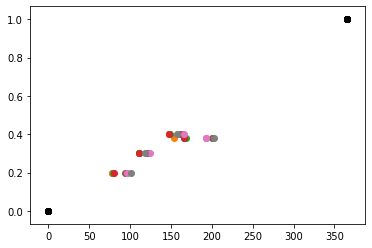

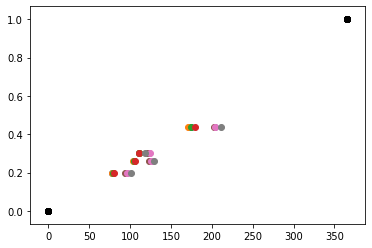

In [95]:
hydro = IF_data[IF_data['Focus']=='Hydro']
thermo = IF_data[IF_data['Focus']!='Hydro']

fig,ax = plt.subplots()
for gh_model in ['lpjml','h08']:
    for cl_model in ['gfdl-esm2m','hadgem2-es','miroc5','ipsl-cm5a-lr']:
        ax.scatter(hydro["_".join(['ndays',gh_model,cl_model])],hydro['discharge reduction'])
        ax.scatter([0,365],[0,1],color='black')                
        
fig,ax = plt.subplots()
for gh_model in ['lpjml','h08']:
    for cl_model in ['gfdl-esm2m','hadgem2-es','miroc5','ipsl-cm5a-lr']:
        ax.scatter(thermo["_".join(['ndays',gh_model,cl_model])],thermo['discharge reduction'])
        ax.scatter([0,365],[0,1],color='black')
        
 #the points in black would be assumptions       

below Matsiro hydro model, a bit of a mess... as seen above the relative discharge during events is much higher compared to the others.
I don't know if their is an error during the calculation or if it is really so.

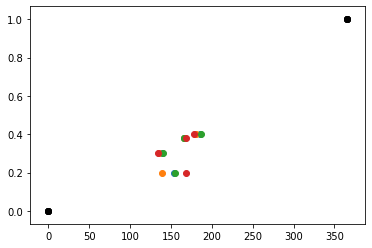

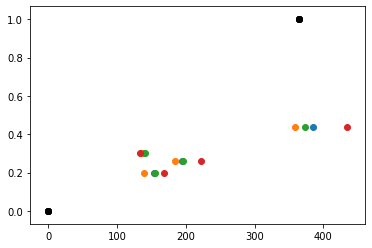

In [94]:
fig,ax = plt.subplots()
for gh_model in ['matsiro']:
    for cl_model in ['gfdl-esm2m','hadgem2-es','miroc5','ipsl-cm5a-lr']:
        ax.scatter(hydro["_".join(['ndays',gh_model,cl_model])],hydro['discharge reduction'])
        ax.scatter([0,365],[0,1], color= 'black')                
        
fig,ax = plt.subplots()
for gh_model in ['matsiro']:
    for cl_model in ['gfdl-esm2m','hadgem2-es','miroc5','ipsl-cm5a-lr']:
        ax.scatter(thermo["_".join(['ndays',gh_model,cl_model])],thermo['discharge reduction'])
        ax.scatter([0,365],[0,1],color = 'black')
        
        
        
#the points in black would be assumptions